<h1>¿Cuales son los limites en los componentes de tiempo de ciclo para medir la confiabilidad de los registros del GPS?</h1>

In [8]:
import modulo_conn_sql as mcq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Query BD SQL-Server Cemex
def querySQL(query, parametros):
    #Conectar con base sql y ejecutar consulta
    cursor = conectarSQL()
    try:
        cursor.execute(query, parametros)
        #obtener nombre de columnas
        names = [ x[0] for x in cursor.description]
        
        #Reunir todos los resultado en rows
        rows = cursor.fetchall()
        resultadoSQL = []
            
        #Hacer un array con los resultados
        while rows:
            resultadoSQL.append(rows)
            if cursor.nextset():
                rows = cursor.fetchall()
            else:
                rows = None
                
        #Redimensionar el array para que quede en dos dimensiones
        resultadoSQL = np.array(resultadoSQL)
        resultadoSQL = np.reshape(resultadoSQL, (resultadoSQL.shape[1], resultadoSQL.shape[2]) )
    finally:
            if cursor is not None:
                cursor.close()
    return pd.DataFrame(resultadoSQL, columns = names)

#SQL Methods to get operation data
def conectarSQL():
    conn = mcq.ConexionSQL()
    cursor = conn.getCursor()
    return cursor

In [3]:
#parametros
pais = 'Colombia'
dias = 30

#Dataframe con los despachos
df = querySQL("{CALL SCAC_AP10_dataset_servicios (?, ?)}", (pais, dias) )
df = df[ (df['Entrega'] != '') & (df['Estatus'] == 'Normal') ]

In [12]:
df.head().T

,0,1,2,3,4
Pedido,8011577532,8011550888,8011577532,8011550888,8011550888
servicio,L006,L001,L007,L002,L003
Entrega,199064786,199063962,199064789,199063969,199063971
Estatus,Normal,Normal,Normal,Normal,Normal
EstatusPedido,Completada - Cabecera,Completada - Cabecera,Completada - Cabecera,Completada - Cabecera,Completada - Cabecera
Cluster,CLUSTER CENTRO,CLUSTER CENTRO,CLUSTER CENTRO,CLUSTER CENTRO,CLUSTER CENTRO
Planta,CO-PLANTA VISTA HERMOSA,CO-PLANTA VISTA HERMOSA,CO-PLANTA VISTA HERMOSA,CO-PLANTA VISTA HERMOSA,CO-PLANTA VISTA HERMOSA
TipoPlanta,Central,Central,Central,Central,Central
Ciudad,Bogotá,Bogotá,Bogotá,Bogotá,Bogotá
Centro,F086,F086,F086,F086,F086


<h4> Analisis tiempo de cargue </h4>

In [19]:
df_tiempocargue = df[ (df['TiempoCargue'] >= 2) &(df['TiempoCargue'] < 60)].groupby(['TiempoCargue'])['Entrega'].agg(['count']).reset_index()
df_tiempocargue

,TiempoCargue,count
0,2,215
1,3,596
2,4,980
3,5,2122
4,6,2512
5,7,2954
6,8,2942
7,9,2774
8,10,2752
9,11,2217


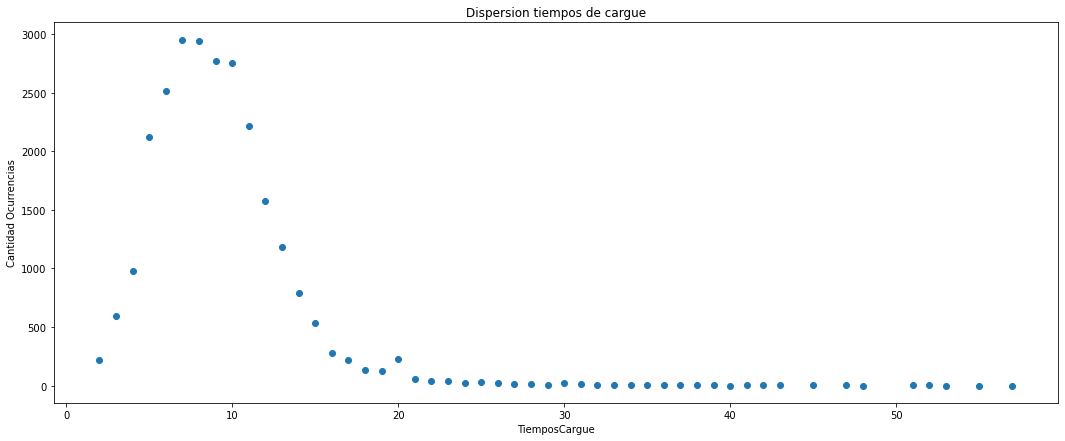

In [20]:
plt.figure(figsize=(18,7))
plt.scatter(df_tiempocargue['TiempoCargue'], df_tiempocargue['count'])
plt.title("Dispersion tiempos de cargue")
plt.xlabel("TiemposCargue")
plt.ylabel("Cantidad Ocurrencias")

plt.show()